<h1 style="color: #492c68;">01 | PREPROCESSING</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [1]:
## Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #327a81;">Data Standardization</h2>

In [2]:
data = pd.read_csv("vg_war_data.csv", index_col=0)

In [3]:
data

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.8+ MB


<h3 style="color: #60b671;">Dealing with Dates</h3>

In [5]:
data[["release_date", "last_update"]] = data[["release_date", "last_update"]].apply(pd.to_datetime)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  6678 non-null   float64       
 6   total_sales   18922 non-null  float64       
 7   na_sales      12637 non-null  float64       
 8   jp_sales      6726 non-null   float64       
 9   pal_sales     12824 non-null  float64       
 10  other_sales   15128 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
 12  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.8+ MB


In [7]:
df = data.copy()

In [8]:
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


<h3 style="color: #60b671;">Removing columns we will not use this time</h3>

In [9]:
df.drop(columns=["developer","na_sales","jp_sales","pal_sales","other_sales","last_update"], inplace=True)

<h3 style="color: #60b671;">Removing weird entries</h3>

In [10]:
df[df["title"] == "The gamrReview Test Game"]

,title,console,genre,publisher,critic_score,total_sales,release_date
31619,The gamrReview Test Game,NES,Fighting,Unknown,10.0,NaN,1994-01-13


In [11]:
df.drop(31619, inplace=True)

<h3 style="color: #60b671;">Checking Nulls</h3>

In [12]:
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
critic_score    57338
total_sales     45093
release_date     7051
dtype: int64

In [13]:
print(f"critic_score has a {round(df.critic_score.isnull().sum()/df.shape[0]*100, 2)} percent of nulls with respect to the total dataset")
print(f"total_sales has a {round(df.total_sales.isnull().sum()/df.shape[0]*100, 2)} percent of nulls with respect to the total dataset")
print(f"release_date has a {round(df.release_date.isnull().sum()/df.shape[0]*100, 2)} percent of nulls with respect to the total dataset")

critic_score has a 89.57 percent of nulls with respect to the total dataset
total_sales has a 70.44 percent of nulls with respect to the total dataset
release_date has a 11.01 percent of nulls with respect to the total dataset


<h2 style="color: #327a81;">Wrangling for specific EDA</h2>

<h3 style="color: #60b671;">Checking Unique Values</h3>

In [14]:
# Console names

consoles = df["console"].unique()
print(f"Gaming dispositives: {consoles}")

Gaming dispositives: ['PS3' 'PS4' 'PS2' 'X360' 'XOne' 'PC' 'PSP' 'Wii' 'PS' 'DS' '2600' 'GBA'
 'NES' 'XB' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'SAT' 'SNES' 'GBC' 'GC' 'NS'
 '3DS' 'GB' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'SCD' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'Mob' 'PCFX' 'Series' 'All' 'iOS' '5200' 'And' 'DSiW' 'Lynx' 'Linux' 'MS'
 'ZXS' 'ACPC' 'Amig' '7800' 'DSi' 'AJ' 'WinP' 'iQue' 'GIZ' 'VB' 'Ouya'
 'NGage' 'AST' 'MSD' 'S32X' 'XS' 'PS5' 'Int' 'CV' 'Arc' 'C64' 'FDS' 'MSX'
 'OR' 'C128' 'CDi' 'CD32' 'BRW' 'FMT' 'ApII' 'Aco' 'BBCM' 'TG16']


In [15]:
# Genre types

genres = df["genre"].unique()
print(f"Genres: {genres}")

Genres: ['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']


In [16]:
# Publisher names

n_publishers = df["publisher"].nunique()
print(f"Number of publisher companies: {n_publishers}")

Number of publisher companies: 3383


<h3 style="color: #60b671;">Renaming Console Names</h3>

In [17]:
consoles_mapping = {
    "PS3": "PlayStation 3",
    "PS4": "PlayStation 4",
    "PS2": "PlayStation 2",
    "X360": "Xbox 360",
    "XOne": "Xbox One",
    "PC": "Personal Computer",
    "PSP": "PlayStation Portable",
    "Wii": "Nintendo Wii",
    "PS": "PlayStation",
    "DS": "Nintendo DS",
    "2600": "Atari 2600",
    "GBA": "Game Boy Advance",
    "NES": "Nintendo Entertainment System",
    "XB": "Xbox",
    "PSN": "PlayStation Network",
    "GEN": "Sega Genesis",
    "PSV": "PlayStation Vita",
    "DC": "Dreamcast",
    "N64": "Nintendo 64",
    "SAT": "Sega Saturn",
    "SNES": "Super Nintendo Entertainment System",
    "GBC": "Game Boy Color",
    "GC": "Nintendo GameCube",
    "NS": "Nintendo Switch",
    "3DS": "Nintendo 3DS",
    "GB": "Game Boy",
    "WiiU": "Wii U",
    "WS": "WonderSwan",
    "VC": "Virtual Console",
    "NG": "Neo Geo",
    "WW": "WonderSwan Color",
    "SCD": "Sega CD",
    "PCE": "PC Engine",
    "XBL": "Xbox Live",
    "3DO": "3DO Interactive Multiplayer",
    "GG": "Sega Game Gear",
    "OSX": "macOS",
    "Mob": "Juegos Móviles",
    "PCFX": "PC-FX",
    "iOS": "iOS",
    "And": "Android",
    "DSiW": "Nintendo DSiWare",
    "Lynx": "Atari Lynx",
    "Linux": "Linux (Operative System)",
    "MS": "Microsoft",
    "ZXS": "ZX Spectrum",
    "ACPC": "Amstrad CPC",
    "Amig": "Amiga",
    "7800": "Atary 7800",
    "DSi": "Nintendo DSi",
    "AJ": "Atari Jaguar",
    "WinP": "Windows Phone",
    "iQue": "iQue Player",
    "GIZ": "Gizmodo",
    "VB": "Virtual Boy",
    "Ouya": "Ouya",
    "NGage": "Nokia N-Gage",
    "AST": "Astrocade",
    "MSD": "Master System",
    "S32X": "Sega 32X",
    "XS": "Xbox Series X/S",
    "PS5": "PlayStation 5",
    "Int": "Intellivision",
    "CV": "ColecoVision",
    "Arc": "Arcades",
    "C64": "Commodore 64",
    "FDS": "Family Computer Disk System",
    "MSX": "MSX",
    "OR": "Oric",
    "C128": "Commodore 128",
    "CDi": "Philips CD-i",
    "CD32": "Commodore Amiga CD32",
    "BRW": "Brew",
    "FMT": "FM Towns",
    "ApII": "Apple II",
    "Aco": "Acorn Electron",
    "BBCM": "BBC Micro",
    "TG16": "TurboGrafx-16"
}

In [18]:
platform = df["console"].map(consoles_mapping)

In [19]:
df.insert(1, "platform", platform)

In [20]:
console = df.pop("console")

In [21]:
df.head(3)

,title,platform,genre,publisher,critic_score,total_sales,release_date
0,Grand Theft Auto V,PlayStation 3,Action,Rockstar Games,9.4,20.32,2013-09-17
1,Grand Theft Auto V,PlayStation 4,Action,Rockstar Games,9.7,19.39,2014-11-18
2,Grand Theft Auto: Vice City,PlayStation 2,Action,Rockstar Games,9.6,16.15,2002-10-28


<h3 style="color: #60b671;">Videogame Company labeling</h3>

In [22]:
sony_computer_entertainment = ["PlayStation 3", "PlayStation 4", "PlayStation 2", "PlayStation Portable", 
                               "PlayStation", "PlayStation Network", "PlayStation Vita", "PlayStation 5"]

nintendo = ["Nintendo Wii", "Nintendo DS", "Nintendo DSi", "Nintendo 3DS", "Nintendo GameCube", "Nintendo Switch", "Nintendo 64",
            "Nintendo Entertainment System", "Nintendo Entertainment System", "Game Boy Advance", "Game Boy Color", 
            "Game Boy", "Wii U", "Nintendo DSiWare", "Virtual Boy", "Family Computer Disk System"]

microsoft = ["Xbox 360", "Xbox One", "Xbox", "Xbox Live", "Xbox Series X/S"]

sega = ["Sega Genesis", "Dreamcast", "Sega Saturn", "Sega CD", "Master System", "Sega 32X", "Sega Game Gear"]

In [23]:
company = []

for console in df["platform"]:
    if console in sony_computer_entertainment:
        company.append("Sony")
    elif console in nintendo:
        company.append("Nintendo")
    elif console in microsoft:
        company.append("Microsoft")
    elif console in sega:
        company.append("Sega")
    else:
        company.append("Other")

In [24]:
df.insert(2, "company", company)

In [25]:
df.head(5)

,title,platform,company,genre,publisher,critic_score,total_sales,release_date
0,Grand Theft Auto V,PlayStation 3,Sony,Action,Rockstar Games,9.4,20.32,2013-09-17
1,Grand Theft Auto V,PlayStation 4,Sony,Action,Rockstar Games,9.7,19.39,2014-11-18
2,Grand Theft Auto: Vice City,PlayStation 2,Sony,Action,Rockstar Games,9.6,16.15,2002-10-28
3,Grand Theft Auto V,Xbox 360,Microsoft,Action,Rockstar Games,NaN,15.86,2013-09-17
4,Call of Duty: Black Ops 3,PlayStation 4,Sony,Shooter,Activision,8.1,15.09,2015-11-06


<h3 style="color: #60b671;">Dropping "Other" Company from dataset</h3>

In [26]:
df = df[df["company"] != "Other"]

<h1 style="color: #492c68;">02 | EDA: Videogame War</h1>

<h2 style="color: #327a81;">Video Games Releases</h2>

<h3 style="color: #60b671;">Games releases by Company</h3>

In [27]:
company_counts = df["company"].value_counts()
company_counts = company_counts.reset_index()
print(company_counts)

     company  count
0       Sony  16619
1   Nintendo  15334
2  Microsoft   7420
3       Sega   2778


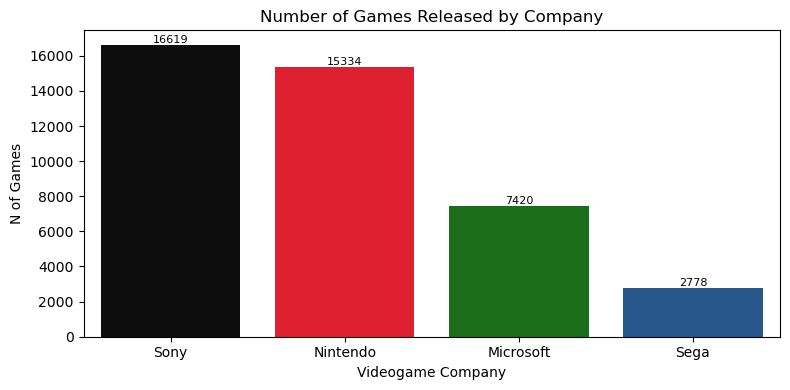

In [28]:
plt.figure(figsize=(8,4))
company_counts_plot = sns.barplot(data=company_counts, x="company", y="count", palette=["#0d0d0d", "#FE0016", "#0e7a0d", "#17569B"])

plt.xlabel("Videogame Company")
plt.ylabel("N of Games")
plt.title("Number of Games Released by Company")

for index, value in enumerate(company_counts["count"]):
    plt.text(index, value, str(round(value, 2)), va='bottom', ha='center', fontsize=8) 

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Histogram of Video Games Releases by Company</h3>

In [29]:
company_counts_dates = df.groupby(["release_date", "company"])["company"].value_counts()

In [30]:
company_counts_dates = company_counts_dates.reset_index()

In [31]:
company_counts_dates

,release_date,company,count
0,1975-10-12,Nintendo,1
1,1983-08-27,Nintendo,1
2,1983-11-22,Nintendo,1
3,1984-07-28,Nintendo,1
4,1984-09-07,Nintendo,1
...,...,...,...
11899,2024-02-29,Sony,1
11900,2024-12-01,Microsoft,1
11901,2024-12-01,Sony,1
11902,2024-12-31,Microsoft,1


In [32]:
histo_company_counts = company_counts_dates.pivot_table(index="release_date", columns= "company", values="count")

In [33]:
histo_company_counts = histo_company_counts.resample("Y").sum()

In [34]:
histo_company_counts = histo_company_counts.reset_index()

In [35]:
histo_company_counts.sample(5)

company,release_date,Microsoft,Nintendo,Sega,Sony
44,2019-12-31,191.0,396.0,0.0,325.0
37,2012-12-31,174.0,403.0,1.0,460.0
17,1992-12-31,0.0,291.0,213.0,0.0
33,2008-12-31,378.0,1019.0,2.0,767.0
10,1985-12-31,0.0,43.0,2.0,0.0


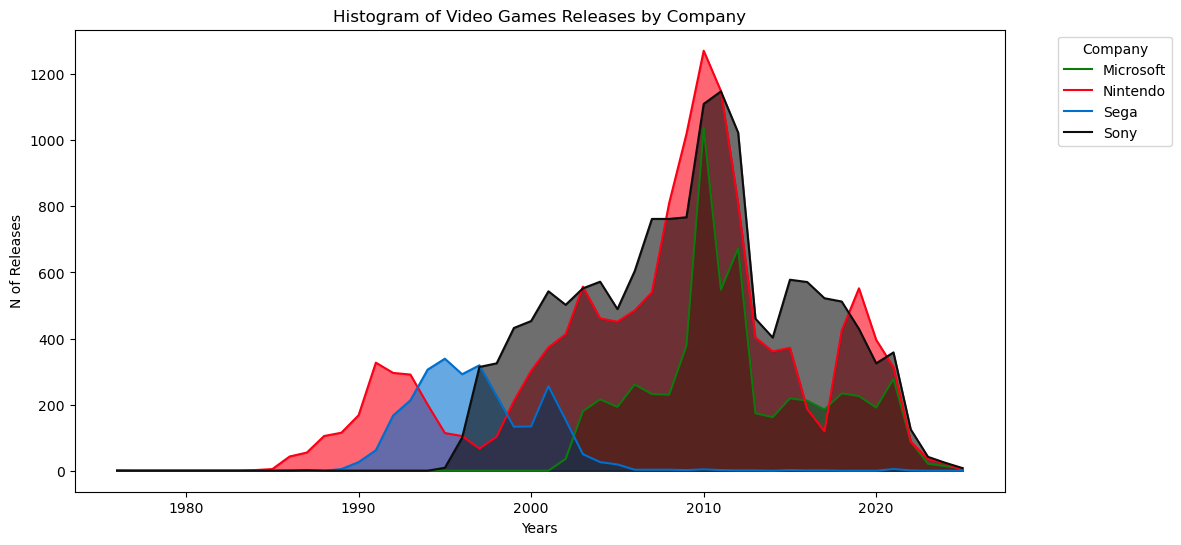

In [36]:
colors= ["#0e7a0d", "#FE0016", "#006FCD", "#0d0d0d"]


plt.figure(figsize=(12,6))

for index, column in enumerate(histo_company_counts.columns[1:]):
    plt.plot(histo_company_counts["release_date"], histo_company_counts[column], label=column, color=colors[index])
    plt.fill_between(histo_company_counts["release_date"], histo_company_counts[column], color=colors[index], alpha=0.6)

plt.title("Histogram of Video Games Releases by Company")
plt.xlabel("Years")
plt.ylabel("N of Releases")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<h2 style="color: #327a81;">Video Games Sales</h2>

<h3 style="color: #60b671;">Total Sales by Company</h3>

In [37]:
company_sales = df.groupby("company")["total_sales"].sum().sort_values(ascending=False)
company_sales = company_sales.reset_index()

In [38]:
company_sales

,company,total_sales
0,Sony,3265.75
1,Nintendo,1598.67
2,Microsoft,1361.00
3,Sega,66.22


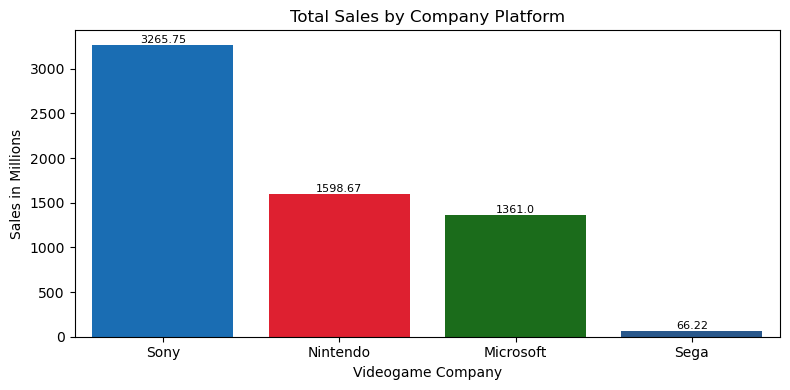

In [39]:
plt.figure(figsize=(8,4))
company_sales_plot = sns.barplot(data=company_sales, x="company", y="total_sales", palette=["#006FCD", "#FE0016", "#0e7a0d", "#17569B"])

plt.xlabel("Videogame Company")
plt.ylabel("Sales in Millions")
plt.title("Total Sales by Company Platform")

for index, value in enumerate(company_sales["total_sales"]):
    plt.text(index, value, str(round(value, 2)), va='bottom', ha='center', fontsize=8) 

plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Histogram of Total Sales by Company</h3>

In [40]:
company_sales_dates = df.groupby(["release_date", "company"])["total_sales"].sum()

In [41]:
company_sales_dates = company_sales_dates.reset_index()

In [42]:
company_sales_dates = company_sales_dates.loc[company_sales_dates["total_sales"] != 0.0]

In [43]:
company_sales_dates

,release_date,company,total_sales
6,1984-11-14,Nintendo,0.69
12,1985-06-04,Nintendo,0.41
21,1985-10-01,Nintendo,0.51
24,1985-10-18,Nintendo,0.82
38,1986-01-04,Nintendo,1.20
...,...,...,...
11500,2020-08-21,Sony,0.03
11576,2020-10-27,Sony,0.13
11630,2020-12-31,Nintendo,1.24
11631,2020-12-31,Sega,0.15


In [44]:
histo_company_sales = company_sales_dates.pivot_table(index="release_date", columns= "company", values="total_sales")

In [45]:
histo_company_sales = histo_company_sales.resample("Y").sum()
histo_company_sales = histo_company_sales.reset_index()
histo_company_sales.head(5)

company,release_date,Microsoft,Nintendo,Sega,Sony
0,1984-12-31,0.0,0.69,0.0,0.0
1,1985-12-31,0.0,1.74,0.0,0.0
2,1986-12-31,0.0,9.95,0.0,0.0
3,1987-12-31,0.0,4.39,0.0,0.0
4,1988-12-31,0.0,7.15,0.0,0.0


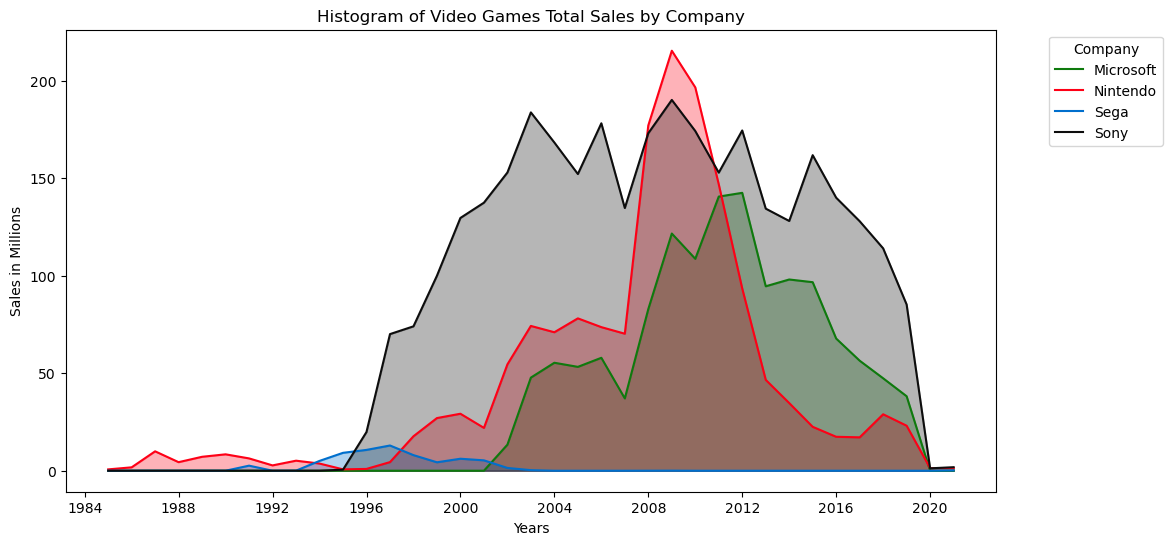

In [46]:
plt.figure(figsize=(12,6))

for index, column in enumerate(histo_company_sales.columns[1:]):
    plt.plot(histo_company_sales["release_date"], histo_company_sales[column], label=column, color=colors[index])
    plt.fill_between(histo_company_sales["release_date"], histo_company_sales[column], color=colors[index], alpha=0.3)

plt.title("Histogram of Video Games Total Sales by Company")
plt.xlabel("Years")
plt.ylabel("Sales in Millions")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<h2 style="color: #327a81;">Exclusive Games by Company</h2>

In [47]:
titles_by_companies = df.groupby(["title"])["company"].unique().reset_index()
titles_by_companies

,title,company
0,#DRIVE Rally,"[Sony, Microsoft, Nintendo]"
1,#IDARB,[Microsoft]
2,#killallzombies,[Sony]
3,'70s Robot Anime: Geppy-X,[Sony]
4,'98 Koshien,[Sony]
...,...,...
28195,yOm,[Microsoft]
28196,yOm_fury,[Microsoft]
28197,¡Shin Chan Flipa en colores!,[Nintendo]
28198,じんるいのみなさまへ,[Nintendo]


In [48]:
titles_exclusives = titles_by_companies[titles_by_companies["company"].apply(lambda x: len(x) == 1)]
titles_exclusives

,title,company
1,#IDARB,[Microsoft]
2,#killallzombies,[Sony]
3,'70s Robot Anime: Geppy-X,[Sony]
4,'98 Koshien,[Sony]
5,'99 Koshien,[Sony]
...,...,...
28195,yOm,[Microsoft]
28196,yOm_fury,[Microsoft]
28197,¡Shin Chan Flipa en colores!,[Nintendo]
28198,じんるいのみなさまへ,[Nintendo]


In [49]:
exclusives_sony = []
exclusives_microsoft = []
exclusives_sega = []
exclusives_nintendo = []

for index, row in titles_exclusives.iterrows():
    if "Microsoft" in row["company"]:
        exclusives_microsoft.append(row["title"])
    elif "Sony" in row["company"]:
        exclusives_sony.append(row["title"])
    elif "Sega" in row["company"]:
        exclusives_sega.append(row["title"])
    elif "Nintendo" in row["company"]:
        exclusives_nintendo.append(row["title"])

In [50]:
print(f"Sony has {len(exclusives_sony)} exclusive titles")
print(f"Microsoft has {len(exclusives_microsoft)} exclusive titles")
print(f"Nintendo has {len(exclusives_nintendo)} exclusive titles")
print(f"Sega has {len(exclusives_sega)} exclusive titles")

Sony has 7942 exclusive titles
Microsoft has 2365 exclusive titles
Nintendo has 10162 exclusive titles
Sega has 1821 exclusive titles


<h3 style="color: #60b671;">Exclusive best sellers by company</h3>

- There is a lot of missing data to find out which exclusive titles are the best-selling by company with accuracy. But anyway let's see the results with the data we have.

In [51]:
exclusives_sega_df = df[df["title"].isin(exclusives_sega)]

In [52]:
exclusive_sega_sales = exclusives_sega_df.groupby("title")["total_sales"].sum().sort_values(ascending=False).reset_index()

In [53]:
exclusive_sega_sales.head(10)

,title,total_sales
0,Mortal Kombat II (US & Others sales),2.39
1,Virtua Fighter 2,1.93
2,NFL 2K,1.20
3,NFL 2K1,1.09
4,Virtua Fighter,1.07
5,Sakura Wars,0.66
6,Virtua Cop,0.62
7,Fighters MEGAMiX,0.62
8,Puyo Puyo Sun,0.60
9,"Sakura Taisen 2 - Kimi, Shinitamou Koto Nakare",0.53


In [54]:
exclusives_nintendo_df = df[df["title"].isin(exclusives_nintendo)]

In [55]:
exclusive_nintendo_sales = exclusives_nintendo_df.groupby("title")["total_sales"].sum().sort_values(ascending=False).reset_index()

In [56]:
exclusive_nintendo_sales.head(10)

,title,total_sales
0,Mario & Sonic at the Olympic Winter Games,8.01
1,Cooking Mama,5.66
2,MySims,5.31
3,Mario & Sonic at the Olympic Games,5.10
4,Cooking Mama 2: Dinner With Friends,3.58
5,Guitar Hero: On Tour,3.46
6,Club Penguin: Elite Penguin Force,3.14
7,MySims Kingdom,3.08
8,Deal or No Deal,3.01
9,Imagine: Fashion Designer,2.96


In [57]:
exclusives_sony_df = df[df["title"].isin(exclusives_sony)]

In [58]:
exclusive_sony_sales = exclusives_sony_df.groupby("title")["total_sales"].sum().sort_values(ascending=False).reset_index()

In [59]:
exclusive_sony_sales.head(10)

,title,total_sales
0,Grand Theft Auto: Vice City,16.15
1,Grand Theft Auto: Liberty City Stories,11.26
2,Uncharted 2: Among Thieves,6.74
3,Gran Turismo (PSP),6.09
4,Grand Theft Auto: Vice City Stories,6.05
5,Tekken 2,5.74
6,Hot Shots Golf,5.35
7,Tomb Raider II,5.24
8,Warzone 2100,5.01
9,Uncharted: Drake's Fortune,4.97


In [60]:
exclusives_microsoft_df = df[df["title"].isin(exclusives_microsoft)]

In [61]:
exclusive_microsoft_sales = exclusives_microsoft_df.groupby("title")["total_sales"].sum().sort_values(ascending=False).reset_index()

In [62]:
exclusive_microsoft_sales.head(10)

,title,total_sales
0,Halo: Reach,9.97
1,Halo 4,9.96
2,Forza Motorsport 3,5.50
3,Fable III,5.10
4,Forza Motorsport 4,4.60
5,Titanfall,4.49
6,Forza Motorsport 2,4.05
7,Halo: The Master Chief Collection,3.44
8,Gears of War 4,3.38
9,Mass Effect,2.91


<h3 style="color: #60b671;">Top rated exclusives in metacritic by company</h3>

In [63]:
exclusive_sega_scores = exclusives_sega_df.groupby(["title", "company"])["critic_score"].mean().sort_values(ascending=False).reset_index()

In [64]:
exclusives_top_sega = exclusive_sega_scores.head(10)
exclusives_top_sega

,title,company,critic_score
0,NFL 2K,Sega,9.7
1,Samba De Amigo Ver. 2000,Sega,9.6
2,NFL 2K1,Sega,9.6
3,Jet Coaster Dream 2,Sega,9.4
4,Quake III Arena,Sega,9.3
5,Skies of Arcadia,Sega,9.2
6,NBA 2K1,Sega,9.2
7,Resident Evil - Code: Veronica,Sega,9.2
8,Panzer Dragoon Saga,Sega,9.1
9,Legacy Of Kain: Soul Reaver,Sega,9.1


In [65]:
exclusive_nintendo_scores = exclusives_nintendo_df.groupby(["title", "company"])["critic_score"].mean().sort_values(ascending=False).reset_index()

In [66]:
exclusives_top_nintendo = exclusive_nintendo_scores.head(10)
exclusives_top_nintendo

,title,company,critic_score
0,Super Mario Bros.,Nintendo,10.00
1,The Legend of Zelda Collector's Edition,Nintendo,10.00
2,The Legend of Zelda: Breath of the Wild,Nintendo,9.95
3,Super Mario Odyssey,Nintendo,9.90
4,The Legend of Zelda: Ocarina of Time,Nintendo,9.90
5,Super Mario Galaxy,Nintendo,9.70
6,Super Mario Bros. Deluxe,Nintendo,9.70
7,Super Mario 64,Nintendo,9.70
8,Super Mario Galaxy 2,Nintendo,9.70
9,The Legend of Zelda: A Link to the Past,Nintendo,9.60


In [67]:
exclusive_sony_scores = exclusives_sony_df.groupby(["title", "company"])["critic_score"].mean().sort_values(ascending=False).reset_index()

In [68]:
exclusives_top_sony = exclusive_sony_scores.head(10)
exclusives_top_sony

,title,company,critic_score
0,God of War (2018),Sony,9.7
1,Chrono Cross,Sony,9.7
2,Tekken 3,Sony,9.6
3,Grand Theft Auto: Vice City,Sony,9.6
4,The Last of Us Remastered,Sony,9.5
5,Uncharted 2: Among Thieves,Sony,9.5
6,LittleBigPlanet: Game of the Year Edition,Sony,9.5
7,Dragon Quest XI: Echoes of an Elusive Age,Sony,9.5
8,The Last of Us,Sony,9.5
9,Final Fantasy XII,Sony,9.4


In [69]:
exclusive_microsoft_scores = exclusives_microsoft_df.groupby(["title", "company"])["critic_score"].mean().sort_values(ascending=False).reset_index()

In [70]:
exclusives_top_microsoft = exclusive_microsoft_scores.head(10)
exclusives_top_microsoft

,title,company,critic_score
0,Fusion: Genesis,Microsoft,10.0
1,Halo 2,Microsoft,9.6
2,Halo 3,Microsoft,9.6
3,Ninja Gaiden Black,Microsoft,9.5
4,Halo: Combat Evolved,Microsoft,9.5
5,Pinball FX 2,Microsoft,9.5
6,Star Wars: Knights of the Old Republic,Microsoft,9.4
7,Gears of War 2,Microsoft,9.4
8,Gears of War,Microsoft,9.4
9,SoulCalibur II(JP sales),Microsoft,9.3


In [71]:
top_exclusives_all = pd.concat([exclusives_top_sega, exclusives_top_nintendo, exclusives_top_sony, exclusives_top_microsoft])

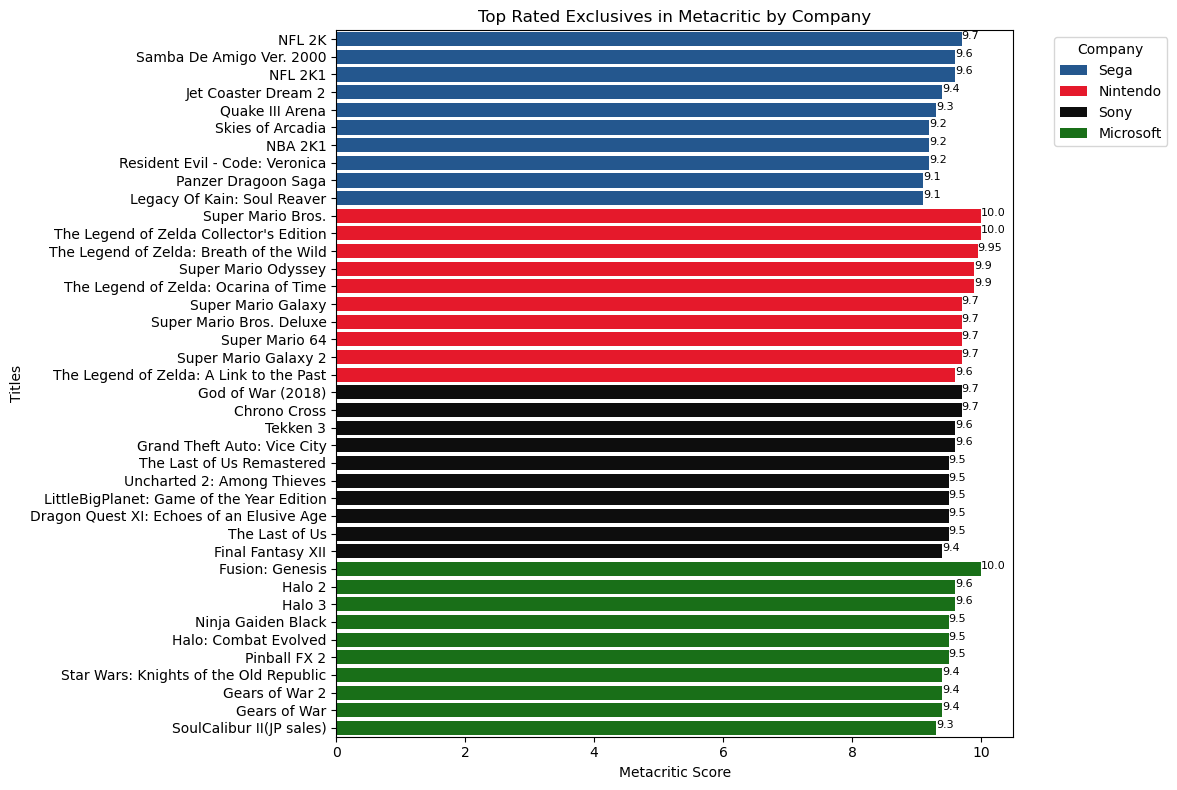

In [72]:
plt.figure(figsize=(12, 8))
exclusive_score_plot = sns.barplot(data=top_exclusives_all, x="critic_score", y="title", hue="company", palette=["#17569B", "#FE0016", "#0d0d0d", "#0e7a0d"], 
            orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
            )

plt.xlabel("Metacritic Score")
plt.ylabel("Titles")
plt.title("Top Rated Exclusives in Metacritic by Company")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")

for index, value in enumerate(top_exclusives_all["critic_score"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=8)
    
plt.tight_layout()
plt.show()

In [73]:
exclusives_all = pd.concat([exclusive_sega_scores, exclusive_nintendo_scores, exclusive_sony_scores, exclusive_microsoft_scores])

In [74]:
exclusives_scores_avg = exclusives_all.groupby("company")["critic_score"].mean().sort_values(ascending=False).reset_index()

In [75]:
exclusives_scores_avg

,company,critic_score
0,Sony,7.258699
1,Microsoft,7.219279
2,Sega,7.122561
3,Nintendo,7.064569


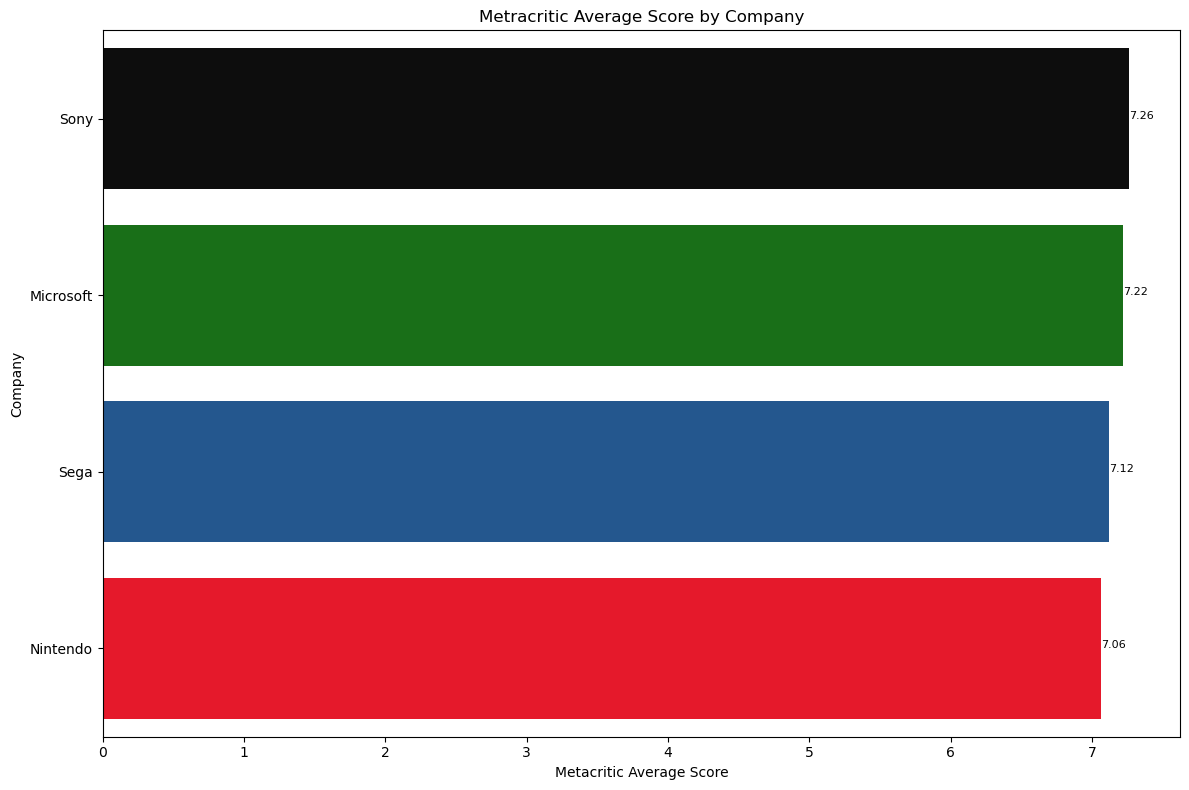

In [76]:
plt.figure(figsize=(12, 8))
exclusive_avg_plot = sns.barplot(data=exclusives_scores_avg, x="critic_score", y="company", palette=["#0d0d0d", "#0e7a0d", "#17569B", "#FE0016"], 
            orient="h", dodge=False, saturation=0.8, ci=None, estimator=sum, 
            )

plt.xlabel("Metacritic Average Score")
plt.ylabel("Company")
plt.title("Metracritic Average Score by Company")

for index, value in enumerate(exclusives_scores_avg["critic_score"]):
    plt.text(value, index, str(round(value, 2)), ha='left', fontsize=8)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Mutiplatform Releases Vs Exclusive Releases</h3>

In [77]:
all_exclusives = list(titles_exclusives["title"])

In [78]:
exclusive_titles_df = df[df["title"].isin(all_exclusives)]

In [79]:
exclusive_titles_df

,title,platform,company,genre,publisher,critic_score,total_sales,release_date
2,Grand Theft Auto: Vice City,PlayStation 2,Sony,Action,Rockstar Games,9.6,16.15,2002-10-28
22,Halo: Reach,Xbox 360,Microsoft,Shooter,Microsoft Game Studios,9.3,9.97,2010-09-14
23,Halo 4,Xbox 360,Microsoft,Shooter,Microsoft Studios,NaN,9.96,2012-11-06
35,Grand Theft Auto: Liberty City Stories,PlayStation Portable,Sony,Action,Rockstar Games,8.8,7.72,2005-10-25
46,Uncharted 2: Among Thieves,PlayStation 3,Sony,Action,Sony Computer Entertainment,9.5,6.74,2009-10-13
...,...,...,...,...,...,...,...,...
63974,The Silver Case,PlayStation,Sony,Visual Novel,ASCII Entertainment,NaN,NaN,1999-10-07
63985,Tlicolity Eyes: Twinkle Snowtime,Nintendo Switch,Nintendo,Visual Novel,Idea Factory,NaN,NaN,2019-07-18
63997,Variable Barricade,PlayStation Vita,Sony,Visual Novel,Idea Factory,NaN,NaN,2019-04-04
64014,Yunohana SpRING! ~Mellow Times~,Nintendo Switch,Nintendo,Visual Novel,Idea Factory,NaN,NaN,2019-02-28


In [80]:
multiplatform_titles_df = df[~df["title"].isin(all_exclusives)]

In [81]:
multiplatform_titles_df

,title,platform,company,genre,publisher,critic_score,total_sales,release_date
0,Grand Theft Auto V,PlayStation 3,Sony,Action,Rockstar Games,9.4,20.32,2013-09-17
1,Grand Theft Auto V,PlayStation 4,Sony,Action,Rockstar Games,9.7,19.39,2014-11-18
3,Grand Theft Auto V,Xbox 360,Microsoft,Action,Rockstar Games,NaN,15.86,2013-09-17
4,Call of Duty: Black Ops 3,PlayStation 4,Sony,Shooter,Activision,8.1,15.09,2015-11-06
5,Call of Duty: Modern Warfare 3,Xbox 360,Microsoft,Shooter,Activision,8.7,14.82,2011-11-08
...,...,...,...,...,...,...,...,...
64005,Witch on the Holy Night,PlayStation 4,Sony,Visual Novel,Type-Moon,NaN,NaN,2022-12-08
64009,World End Syndrome,PlayStation Vita,Sony,Visual Novel,Arc System Works,NaN,NaN,2018-04-26
64010,World End Syndrome,PlayStation 4,Sony,Visual Novel,Arc System Works,NaN,NaN,2018-04-26
64012,"Yoru, Tomosu",PlayStation 4,Sony,Visual Novel,Nippon Ichi Software,NaN,NaN,2020-07-30


In [82]:
exclusive_releases = exclusive_titles_df.groupby("release_date")["title"].count().reset_index()

In [83]:
exclusive_releases.rename(columns={"title":"exclusives"}, inplace=True)

In [84]:
multiplatform_releases = multiplatform_titles_df.groupby("release_date")["title"].count().reset_index()

In [85]:
multiplatform_releases.rename(columns={"title":"multiplatform"}, inplace=True)

In [86]:
ex_mult_releases = pd.merge(exclusive_releases, multiplatform_releases, how="outer")

In [93]:
ex_mult_releases = ex_mult_releases.loc[(ex_mult_releases["exclusives"] != 0.0) & (ex_mult_releases["multiplatform"] != 0.0)]

In [94]:
ex_mult_releases = ex_mult_releases.set_index("release_date").resample("Y").sum().reset_index()

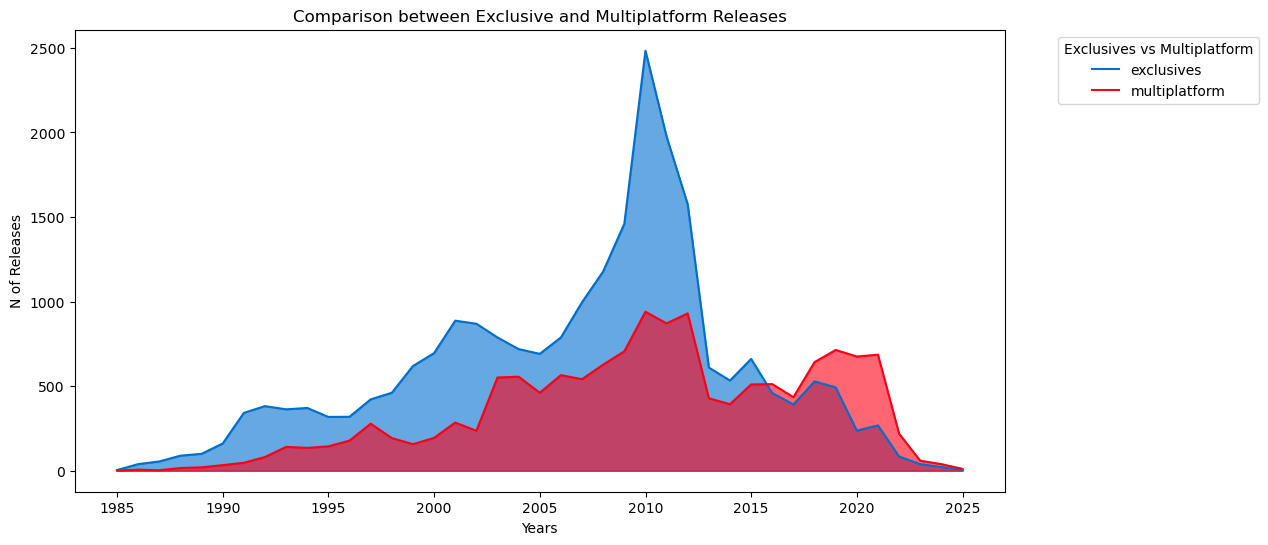

In [95]:
pair_colors = ["#006FCD", "#FE0016"]

plt.figure(figsize=(12,6))

for index, column in enumerate(ex_mult_releases.columns[1:]):
    plt.plot(ex_mult_releases["release_date"], ex_mult_releases[column], label=column, color=pair_colors[index])
    plt.fill_between(ex_mult_releases["release_date"], ex_mult_releases[column], color=pair_colors[index], alpha=0.6)

plt.title("Comparison between Exclusive and Multiplatform Releases")
plt.xlabel("Years")
plt.ylabel("N of Releases")
ex_multi_labels = ["Exclusives","Multiplatform"]
plt.legend(title="Exclusives vs Multiplatform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()